# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import os as module
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | det udom
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | oliveira dos brejinhos
Processing Record 6 of Set 1 | dudinka
Processing Record 7 of Set 1 | midvagur
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | mukdahan
Processing Record 14 of Set 1 | san juan de miraflores
Processing Record 15 of Set 1 | lospalos
Processing Record 16 of Set 1 | aqadyr
Processing Record 17 of Set 1 | sawakin
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | hanawa
Processing Record 21 of Set 1 | culebra
Processing Record 22 of Set 1 | nikolayevsk-on-amure


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,7.02,63,0,3.09,US,1707764848
1,blackmans bay,-43.0167,147.3167,12.07,93,88,1.21,AU,1707765464
2,det udom,14.9060,105.0784,18.90,78,86,1.64,TH,1707765465
3,waitangi,-43.9535,-176.5597,14.90,84,24,4.47,NZ,1707765465
4,oliveira dos brejinhos,-12.3169,-42.8961,29.77,45,100,4.28,BR,1707765465


In [20]:
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,7.02,63,0,3.09,US,2024-02-12
1,blackmans bay,-43.0167,147.3167,12.07,93,88,1.21,AU,2024-02-12
2,det udom,14.9060,105.0784,18.90,78,86,1.64,TH,2024-02-12
3,waitangi,-43.9535,-176.5597,14.90,84,24,4.47,NZ,2024-02-12
4,oliveira dos brejinhos,-12.3169,-42.8961,29.77,45,100,4.28,BR,2024-02-12


In [30]:

# Export the City_Data into a csv
city_data_df.to_csv("__pycache__\output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("__pycache__/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,7.02,63,0,3.09,US,2024-02-12
1,blackmans bay,-43.0167,147.3167,12.07,93,88,1.21,AU,2024-02-12
2,det udom,14.9060,105.0784,18.90,78,86,1.64,TH,2024-02-12
3,waitangi,-43.9535,-176.5597,14.90,84,24,4.47,NZ,2024-02-12
4,oliveira dos brejinhos,-12.3169,-42.8961,29.77,45,100,4.28,BR,2024-02-12


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

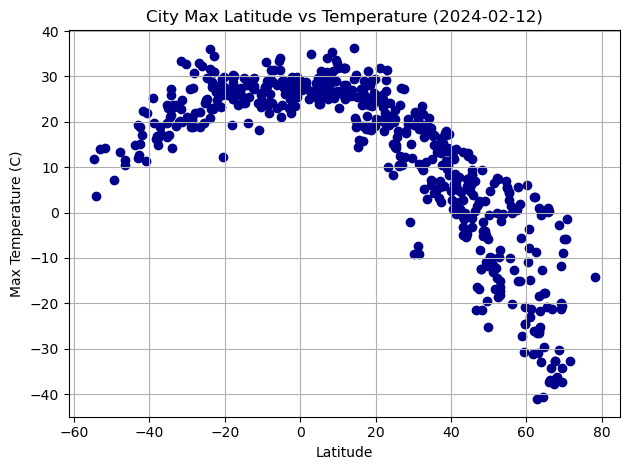

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", facecolors= "#00008b")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
date = city_data_df["Date"].min()
plt.title(f"City Max Latitude vs Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("__pycache__/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

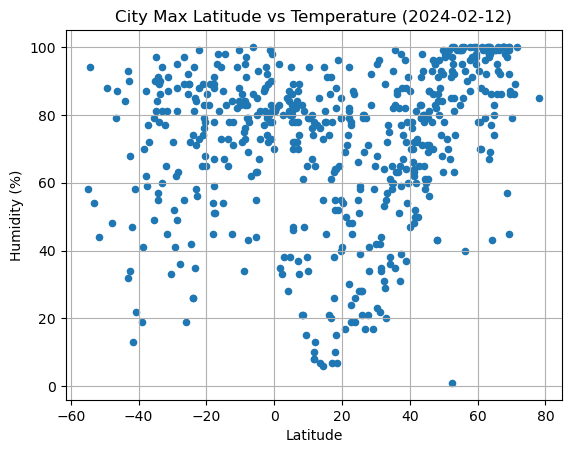

In [43]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", marker="o",
                  grid=True, facecolors= "#00008b", title=f"City Max Latitude vs Temperature ({date})")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("__pycache__/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

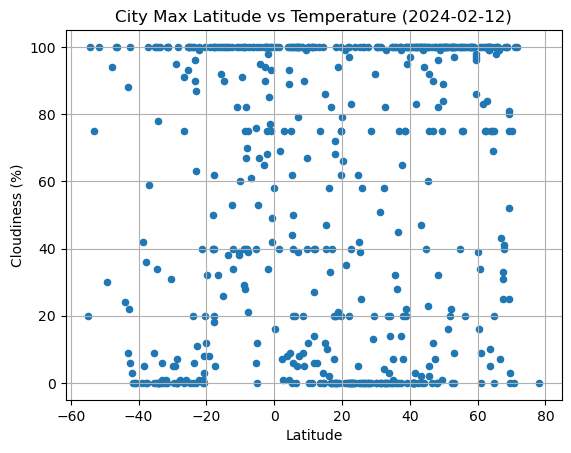

In [44]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", marker="o",
                  grid=True, facecolors= "#00008b", title=f"City Max Latitude vs Temperature ({date})")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("__pycache__/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

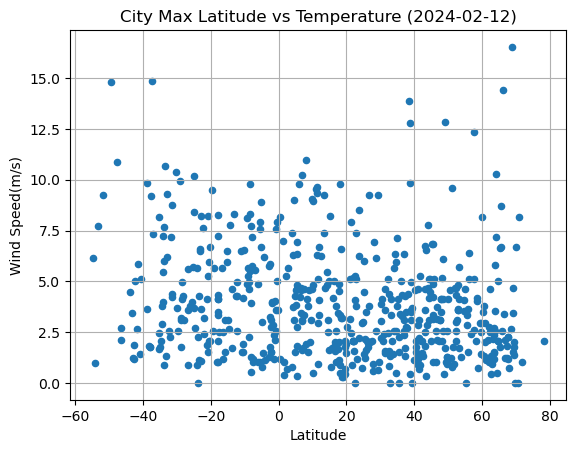

In [45]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", marker="o",
                  grid=True, facecolors= "#00008b", title=f"City Max Latitude vs Temperature ({date})")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Save the figure
plt.savefig("__pycache__/output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,7.02,63,0,3.09,US,2024-02-12
2,det udom,14.9060,105.0784,18.90,78,86,1.64,TH,2024-02-12
5,dudinka,69.4058,86.1778,-37.40,99,25,1.79,RU,2024-02-12
6,midvagur,62.0511,-7.1939,3.46,87,75,1.03,FO,2024-02-12
10,aasiaat,68.7098,-52.8699,-30.26,97,100,2.66,GL,2024-02-12


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,12.07,93,88,1.21,AU,2024-02-12
3,waitangi,-43.9535,-176.5597,14.90,84,24,4.47,NZ,2024-02-12
4,oliveira dos brejinhos,-12.3169,-42.8961,29.77,45,100,4.28,BR,2024-02-12
7,hermanus,-34.4187,19.2345,21.56,90,78,2.90,ZA,2024-02-12
8,carnarvon,-24.8667,113.6333,25.03,72,0,10.19,AU,2024-02-12


###  Temperature vs. Latitude Linear Regression Plot

linear equation: y = -0.82x + 37.31
The r-value is: -0.8793583814071915


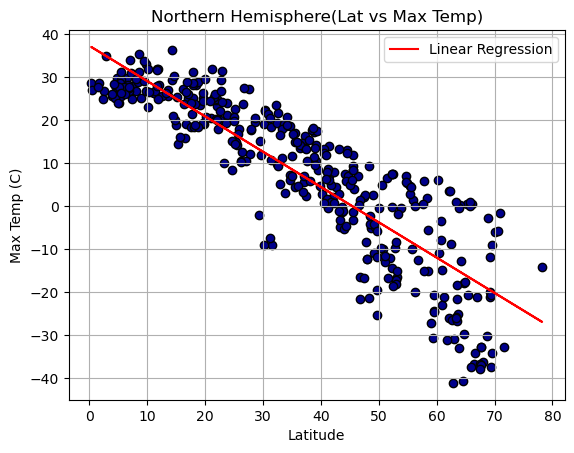

In [73]:
# Define x and y values for data points
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

# Linear regression on Northern Hemisphere
plt.scatter(x, y, marker="o", facecolors="darkblue", edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x, y)
    reg_value = x*slope + intercept
    plt.plot(x, reg_value, color="r", label="Linear Regression")
    plt.title("Northern Hemisphere(Lat vs Max Temp)")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    linear_eq = f"y = {(round(slope,2))}x + {(round(intercept,2))}"
    print(f"linear equation: {linear_eq}")
    plt.savefig(f"__pycache__/output_data/LinearRegression_{name}.png")
    print(f"The r-value is: {rvalue}")

# Define name
name = "NH_LatVsMaxTemp" 

# Call the plot_linear_regression() function with the appropriate arguments
plot_linear_regression(x, y)

# Display the legend on the graph
plt.legend()

plt.show()
    

linear equation: y = 0.27x + 29.97
The r-value is: 0.6598886551332003


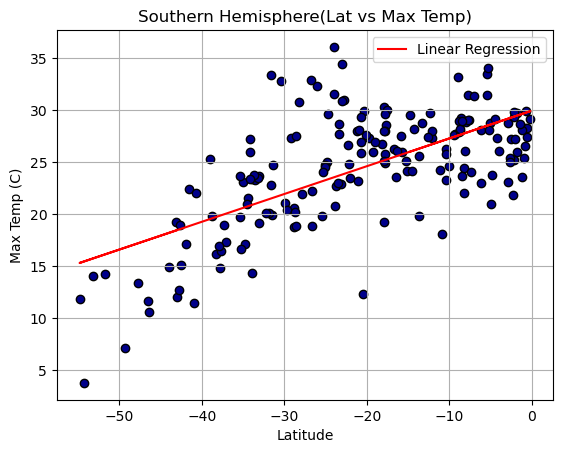

In [74]:
# Linear regression on Southern Hemisphere
# Define x and y values for data points
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

# Linear regression on Northern Hemisphere
plt.scatter(x, y, marker="o", facecolors="darkblue", edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x, y)
    reg_value = x*slope + intercept
    plt.plot(x, reg_value, color="r", label="Linear Regression")
    plt.title("Southern Hemisphere(Lat vs Max Temp)")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp (C)")
    linear_eq = f"y = {(round(slope,2))}x + {(round(intercept,2))}"
    print(f"linear equation: {linear_eq}")
    plt.savefig(f"__pycache__/output_data/LinearRegression_{name}.png")
    print(f"The r-value is: {rvalue}")

# Define name
name = "SH_LatVsMaxTemp" 

# Call the plot_linear_regression() function with the appropriate arguments
plot_linear_regression(x, y)

# Display the legend on the graph
plt.legend()

plt.show()

**Discussion about the linear relationship:
Latitude and Maximum Temperature show a strong relationship. Northern hemisphere had a negative correlation (-0.8793583814071915) whereas Southern Hemisphere depicted a positive relationship (0.6598886551332003) which shows that the Maximum Temperature increases as it gets closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

linear equation: y = 0.54x + 51.2
The r-value is: 0.4413881720294183


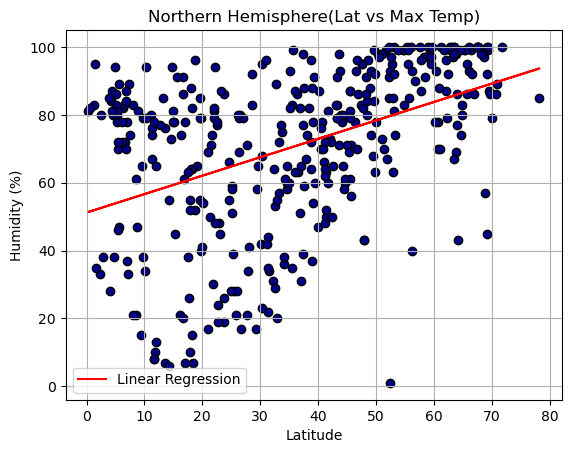

In [75]:
# Northern Hemisphere
# Define x and y values for data points
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

# Linear regression on Northern Hemisphere
plt.scatter(x, y, marker="o", facecolors="darkblue", edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x, y)
    reg_value = x*slope + intercept
    plt.plot(x, reg_value, color="r", label="Linear Regression")
    plt.title("Northern Hemisphere(Lat vs Max Temp)")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    linear_eq = f"y = {(round(slope,2))}x + {(round(intercept,2))}"
    print(f"linear equation: {linear_eq}")
    plt.savefig(f"__pycache__/output_data/LinearRegression_{name}.png")
    print(f"The r-value is: {rvalue}")

# Define name
name = "NH_LatVsHumidity" 

# Call the plot_linear_regression() function with the appropriate arguments
plot_linear_regression(x, y)

# Display the legend on the graph
plt.legend()

plt.show()

linear equation: y = 0.38x + 81.28
The r-value is: 0.27153694857127963


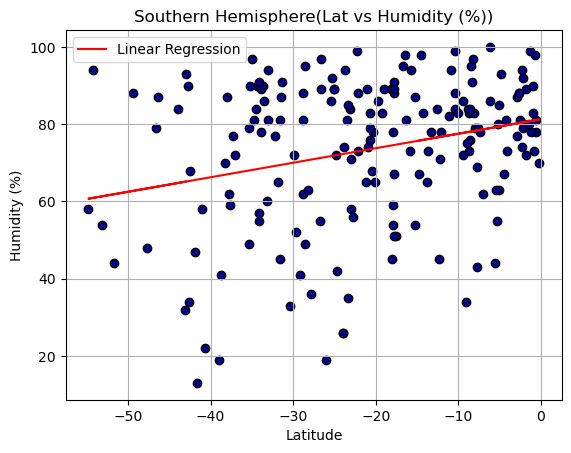

In [76]:
# Southern Hemisphere
# Define x and y values for data points
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

# Linear regression on Northern Hemisphere
plt.scatter(x, y, marker="o", facecolors="darkblue", edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x, y)
    reg_value = x*slope + intercept
    plt.plot(x, reg_value, color="r", label="Linear Regression")
    plt.title("Southern Hemisphere(Lat vs Humidity (%))")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    linear_eq = f"y = {(round(slope,2))}x + {(round(intercept,2))}"
    print(f"linear equation: {linear_eq}")
    plt.savefig(f"__pycache__/output_data/LinearRegression_{name}.png")
    print(f"The r-value is: {rvalue}")

# Define name
name = "SH_LatVsHumidity" 

# Call the plot_linear_regression() function with the appropriate arguments
plot_linear_regression(x, y)

# Display the legend on the graph
plt.legend()

plt.show()

**Discussion about the linear relationship:
Both the above graphs have scatter points too spread out and the relationship between Latitude and the Humidity has a slight positive relation. Therefore, it's easy to conclude that proximity to the equator does not have any effect on the humidity in the area.

### Cloudiness vs. Latitude Linear Regression Plot

linear equation: y = 0.49x + 37.84
The r-value is: 0.22696781559699364


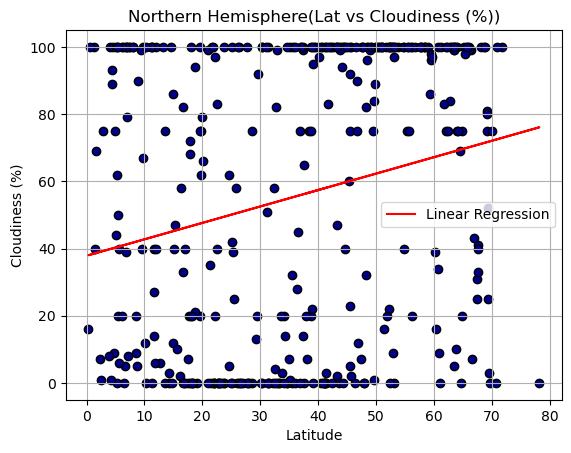

In [77]:
# Northern Hemisphere
# Define x and y values for data points
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

# Linear regression on Northern Hemisphere
plt.scatter(x, y, marker="o", facecolors="darkblue", edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x, y)
    reg_value = x*slope + intercept
    plt.plot(x, reg_value, color="r", label="Linear Regression")
    plt.title("Northern Hemisphere(Lat vs Cloudiness (%))")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    linear_eq = f"y = {(round(slope,2))}x + {(round(intercept,2))}"
    print(f"linear equation: {linear_eq}")
    plt.savefig(f"__pycache__/output_data/LinearRegression_{name}.png")
    print(f"The r-value is: {rvalue}")

# Define name
name = "NH_LatVsCloudiness" 

# Call the plot_linear_regression() function with the appropriate arguments
plot_linear_regression(x, y)

# Display the legend on the graph
plt.legend()

plt.show()

linear equation: y = 0.91x + 73.79
The r-value is: 0.30651723838040046


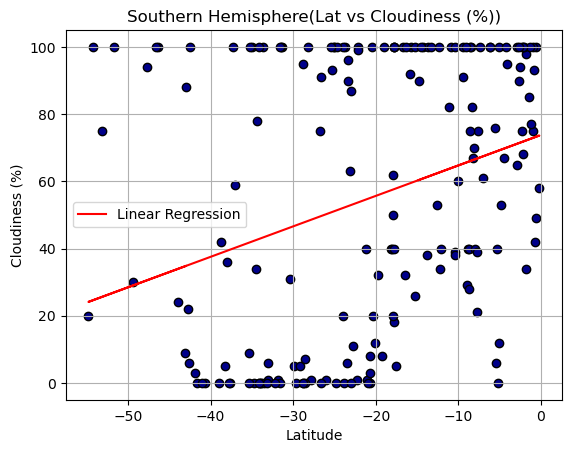

In [78]:
# Southern Hemisphere
# Define x and y values for data points
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

# Linear regression on Northern Hemisphere
plt.scatter(x, y, marker="o", facecolors="darkblue", edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x, y)
    reg_value = x*slope + intercept
    plt.plot(x, reg_value, color="r", label="Linear Regression")
    plt.title("Southern Hemisphere(Lat vs Cloudiness (%))")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    linear_eq = f"y = {(round(slope,2))}x + {(round(intercept,2))}"
    print(f"linear equation: {linear_eq}")
    plt.savefig(f"__pycache__/output_data/LinearRegression_{name}.png")
    print(f"The r-value is: {rvalue}")

# Define name
name = "SH_LatVsCloudiness" 

# Call the plot_linear_regression() function with the appropriate arguments
plot_linear_regression(x, y)

# Display the legend on the graph
plt.legend()

plt.show()

**Discussion about the linear relationship:
Both the above graphs have scatter points too spread out and the relationship between Latitude and the Cloudiness has a slight positive relation. Therefore, it's easy to conclude that proximity to the equator does not have any effect on the Cloudiness in the area.

### Wind Speed vs. Latitude Linear Regression Plot

linear equation: y = -0.01x + 4.03
The r-value is: -0.09896591452043461


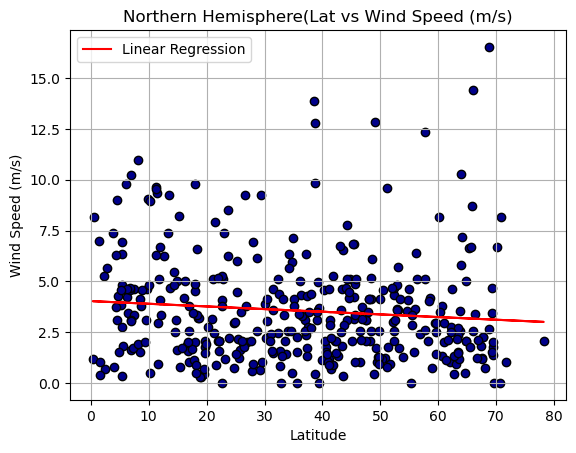

In [79]:
# Northern Hemisphere
# Define x and y values for data points
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

# Linear regression on Northern Hemisphere
plt.scatter(x, y, marker="o", facecolors="darkblue", edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x, y)
    reg_value = x*slope + intercept
    plt.plot(x, reg_value, color="r", label="Linear Regression")
    plt.title("Northern Hemisphere(Lat vs Wind Speed (m/s)")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    linear_eq = f"y = {(round(slope,2))}x + {(round(intercept,2))}"
    print(f"linear equation: {linear_eq}")
    plt.savefig(f"__pycache__/output_data/LinearRegression_{name}.png")
    print(f"The r-value is: {rvalue}")

# Define name
name = "NH_LatVsWind Speed" 

# Call the plot_linear_regression() function with the appropriate arguments
plot_linear_regression(x, y)

# Display the legend on the graph
plt.legend()

plt.show()

linear equation: y = -0.03x + 3.8
The r-value is: -0.1482491361936307


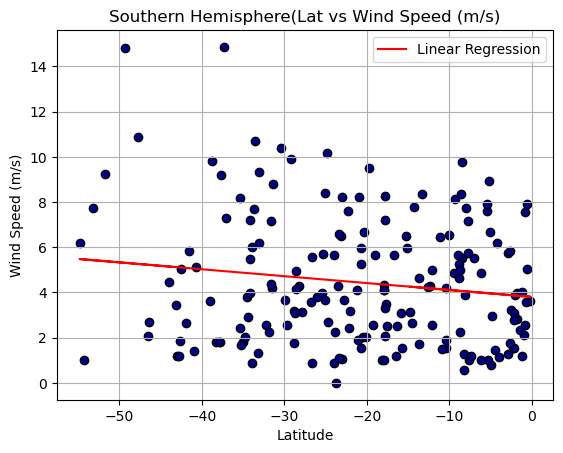

In [80]:
# Southern Hemisphere
# Define x and y values for data points
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

# Linear regression on Northern Hemisphere
plt.scatter(x, y, marker="o", facecolors="darkblue", edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Define a function to create Linear Regression plots
def plot_linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x, y)
    reg_value = x*slope + intercept
    plt.plot(x, reg_value, color="r", label="Linear Regression")
    plt.title("Southern Hemisphere(Lat vs Wind Speed (m/s)")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    linear_eq = f"y = {(round(slope,2))}x + {(round(intercept,2))}"
    print(f"linear equation: {linear_eq}")
    plt.savefig(f"__pycache__/output_data/LinearRegression_{name}.png")
    print(f"The r-value is: {rvalue}")

# Define name
name = "SH_LatVsWind Speed" 

# Call the plot_linear_regression() function with the appropriate arguments
plot_linear_regression(x, y)

# Display the legend on the graph
plt.legend()

plt.show()

**Discussion about the linear relationship:
There is no relationship between the Latitude and the Wind Speed. rvalue for both the hemispheres was too low (-0.09896591452043461 & -0.1482491361936307) and the scatter points were too spread out. Therefore, there is no correlation between the latitude and the wind speed. 